# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Set up calls with json
import json

# base url
base_url = f"http://api.openweathermap.org/data/2.5/weather?"

# to make temps in farenheit (from Open Weather API documentation)
units = "imperial"

# Initialize count for printing record list
number = 0

# make empty lists for collecting data
lat = []
lon = []
temp = []
hum = []
clouds = []
wind_speed = []
city_name = []
max_temp = []
country = []

# Making the data record list look pretty
print(f'-------------------------------')
print(f'Data Retrieval Initialized')      
print(f'-------------------------------')

#loop through the list of cities generated above and get information needed to make graphs below
for city in cities:
    query = f'q={city}&units={units}&appid={weather_api_key}'
    response = requests.get(base_url+query).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(response['name'])
        max_temp.append(response['main']['temp_max'])
        country.append(response['sys']['country'])
        # progress the count
        number = number + 1
        print(f'Processing Record {number} of {len(cities)} | {city}')
    except KeyError:
        print(f'{city} is not found. Skipping...')

# Notified when completed
print(f'-------------------------------')
print(f'Data Retrieval Complete')      
print(f'-------------------------------')

-------------------------------
Data Retrieval Initialized
-------------------------------
Processing Record 1 of 614 | bluff
Processing Record 2 of 614 | busselton
Processing Record 3 of 614 | porto novo
Processing Record 4 of 614 | tete
Processing Record 5 of 614 | barrow
Processing Record 6 of 614 | awbari
Processing Record 7 of 614 | hilo
Processing Record 8 of 614 | hobart
Processing Record 9 of 614 | tuktoyaktuk
Processing Record 10 of 614 | abalak
Processing Record 11 of 614 | hermanus
Processing Record 12 of 614 | talnakh
Processing Record 13 of 614 | cockburn town
Processing Record 14 of 614 | quatre cocos
Processing Record 15 of 614 | camacupa
Processing Record 16 of 614 | chokurdakh
Processing Record 17 of 614 | ushuaia
Processing Record 18 of 614 | cherskiy
Processing Record 19 of 614 | albany
Processing Record 20 of 614 | mataura
Processing Record 21 of 614 | nizwa
Processing Record 22 of 614 | castro
Processing Record 23 of 614 | jalu
Processing Record 24 of 614 | rikitea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
cities_df = pd.DataFrame({"City" : city_name, "Country" : country, "Lat" : lat, "Lng": lon, "Temp (F)" : temp, "Humidity" : hum, "Cloudiness": clouds, "Wind Speed": wind_speed, "Max Temp (F)": max_temp})
cities_df.to_csv("cities.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
# check the number of cities that have >100% humidity
greaterthan100 = cities_df[cities_df['Humidity'] > 100].index
print(len(greaterthan100))

# look at top humidity values to check
hum_sorted = cities_df.sort_values('Humidity', ascending=False)
hum_sorted.head(25)


0


,City,Country,Lat,Lng,Temp (F),Humidity,Cloudiness,Wind Speed,Max Temp (F)
400,Lexington,US,37.9887,-84.4777,49.91,100,90,9.22,51.01
420,Chapleau,CA,47.8405,-83.4034,32.00,100,90,8.05,32.00
99,Alyangula,AU,-13.8483,136.4192,77.00,100,75,12.30,77.00
463,Petropavlovsk-Kamchatskiy,RU,53.0452,158.6483,35.60,100,90,8.95,35.60
375,Vytegra,RU,61.0064,36.4481,35.11,99,100,2.91,35.11
250,Ostrovnoy,RU,68.0531,39.5131,34.72,99,100,5.99,34.72
289,Zhigansk,RU,66.7697,123.3711,33.37,99,100,6.89,33.37
374,Obo,CF,5.3998,26.4869,68.70,98,100,3.13,68.70
412,Maridi,SS,4.9158,29.4742,66.20,98,100,2.95,66.20
249,Tilichiki,RU,60.4667,166.1000,29.48,98,100,2.66,29.48


In [6]:
#  Get the indices of cities that have humidity over 100%.



# There are no cities with greater than 100% humidity

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

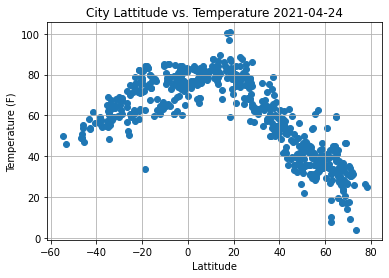

<Figure size 432x288 with 0 Axes>

In [14]:
import datetime

#Plot latitude vs temperature and save as .png
plt.scatter(cities_df['Lat'], cities_df['Temp (F)'])
plt.title(f'City Lattitude vs. Temperature {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.show()
plt.savefig('lat_temp.png')

## Latitude vs. Humidity Plot

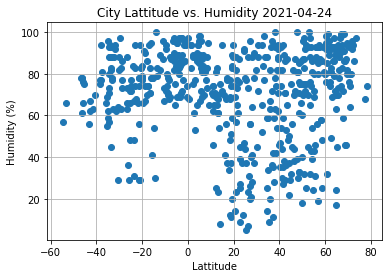

<Figure size 432x288 with 0 Axes>

In [15]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'])
plt.title(f'City Lattitude vs. Humidity {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()
plt.savefig('lat_hum.png')

## Latitude vs. Cloudiness Plot

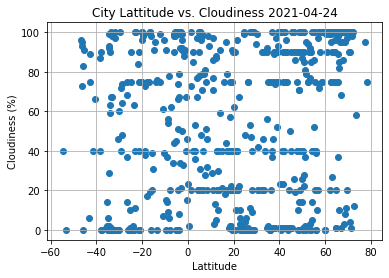

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'])
plt.title(f'City Lattitude vs. Cloudiness {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.show()
plt.savefig('lat_temp.clouds.png')

## Latitude vs. Wind Speed Plot

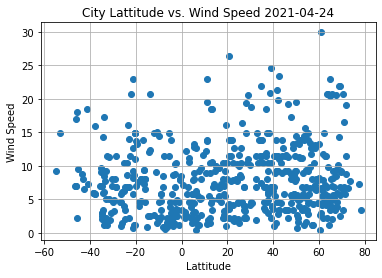

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'])
plt.title(f'City Lattitude vs. Wind Speed {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()
plt.savefig('lat_wind.png')

## Linear Regression

In [18]:
# Make df for Northern and souther hemisphere
NH_df = cities_df.loc[cities_df['Lat'] > 0, :]

SH_df = cities_df.loc[cities_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

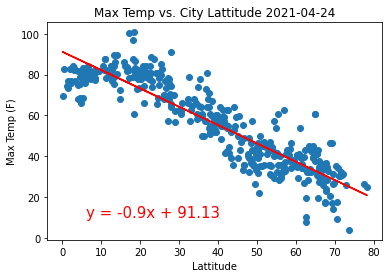

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(NH_df['Lat'], NH_df['Max Temp (F)'])
plt.title(f'Max Temp vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Max Temp (F)')

x_values = NH_df['Lat']
y_values = NH_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_maxtemp_lat.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

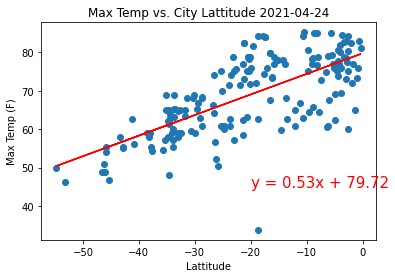

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(SH_df['Lat'], SH_df['Max Temp (F)'])
plt.title(f'Max Temp vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Max Temp (F)')

x_values = SH_df['Lat']
y_values = SH_df['Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,45),fontsize=15, color="red")

plt.show()
plt.savefig('SH_maxtemp_lat.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

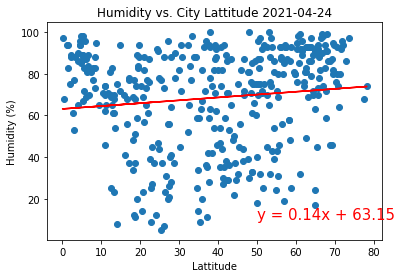

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(NH_df['Lat'], NH_df['Humidity'])
plt.title(f'Humidity vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')

x_values = NH_df['Lat']
y_values = NH_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_hum_lat.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

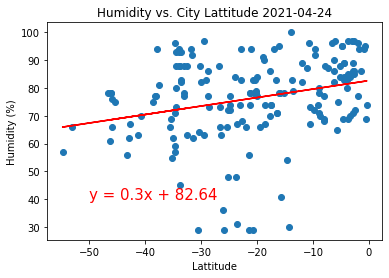

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(SH_df['Lat'], SH_df['Humidity'])
plt.title(f'Humidity vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')

x_values = SH_df['Lat']
y_values = SH_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,40),fontsize=15, color="red")

plt.show()
plt.savefig('SH_hum_lat.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

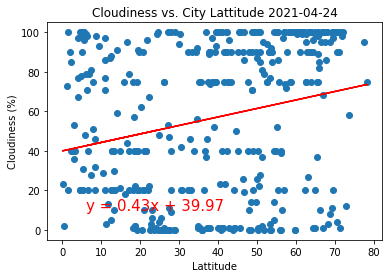

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(NH_df['Lat'], NH_df['Cloudiness'])
plt.title(f'Cloudiness vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')

x_values = NH_df['Lat']
y_values = NH_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10),fontsize=15, color="red")

plt.show()
plt.savefig('NH_clouds_lat.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

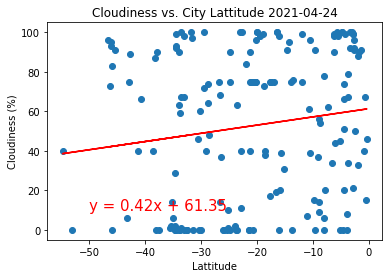

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(SH_df['Lat'], SH_df['Cloudiness'])
plt.title(f'Cloudiness vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')

x_values = SH_df['Lat']
y_values = SH_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,10),fontsize=15, color="red")

plt.show()
plt.savefig('SH_clouds_lat.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

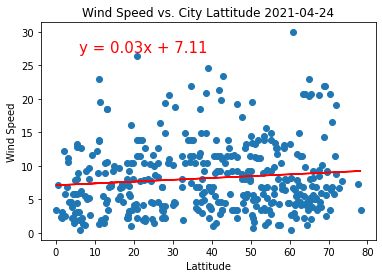

<Figure size 432x288 with 0 Axes>

In [29]:
plt.scatter(NH_df['Lat'], NH_df['Wind Speed'])
plt.title(f'Wind Speed vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')

x_values = NH_df['Lat']
y_values = NH_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,27),fontsize=15, color="red")

plt.show()
plt.savefig('NH_wind_lat.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

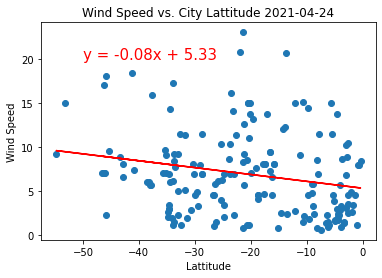

<Figure size 432x288 with 0 Axes>

In [30]:
plt.scatter(SH_df['Lat'], SH_df['Wind Speed'])
plt.title(f'Wind Speed vs. City Lattitude {datetime.date.today()}')
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed')

x_values = SH_df['Lat']
y_values = SH_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20),fontsize=15, color="red")

plt.show()
plt.savefig('SH_wind_lat.png')